The below analysis is done  for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import seaborn as sns


Upload data in Data frame 

In [3]:
df=pd.read_csv("Temperature forecast.csv")

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


# Columns in Data Frame

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#Tpes of data are are float and one object type only

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# here we find shape of data

In [10]:
df.shape

(7752, 25)

In [11]:
df.describe(include="all")

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
unique,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,30-06-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.000000,NaN,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,NaN,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,NaN,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,NaN,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,NaN,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,NaN,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000


# There are many null values presesnt in data set

In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# There are many unique values presesnt in data set 

In [13]:
df.nunique().to_frame("unique values")

,unique values
station,25
Date,310
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675


# Here we find corelation between data

In [14]:
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


<Axes: >

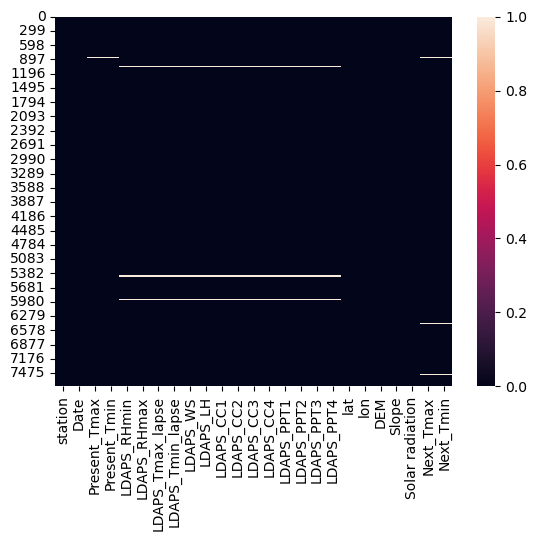

In [15]:
sns.heatmap(df.isnull())

<Axes: >

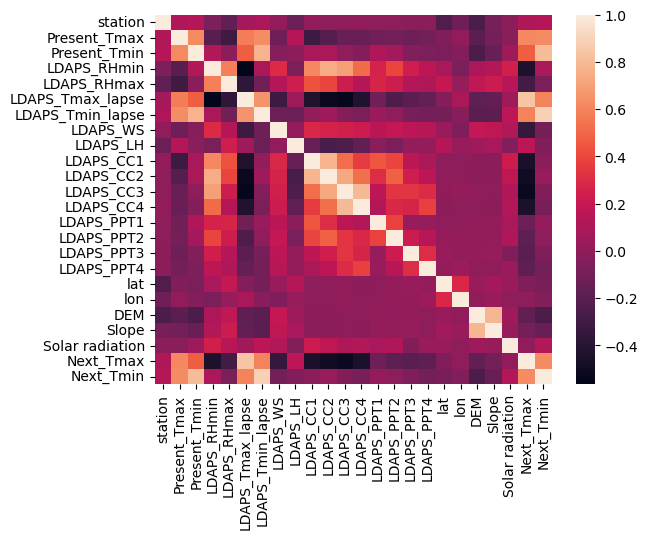

In [16]:
sns.heatmap(dfcor)

In [17]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

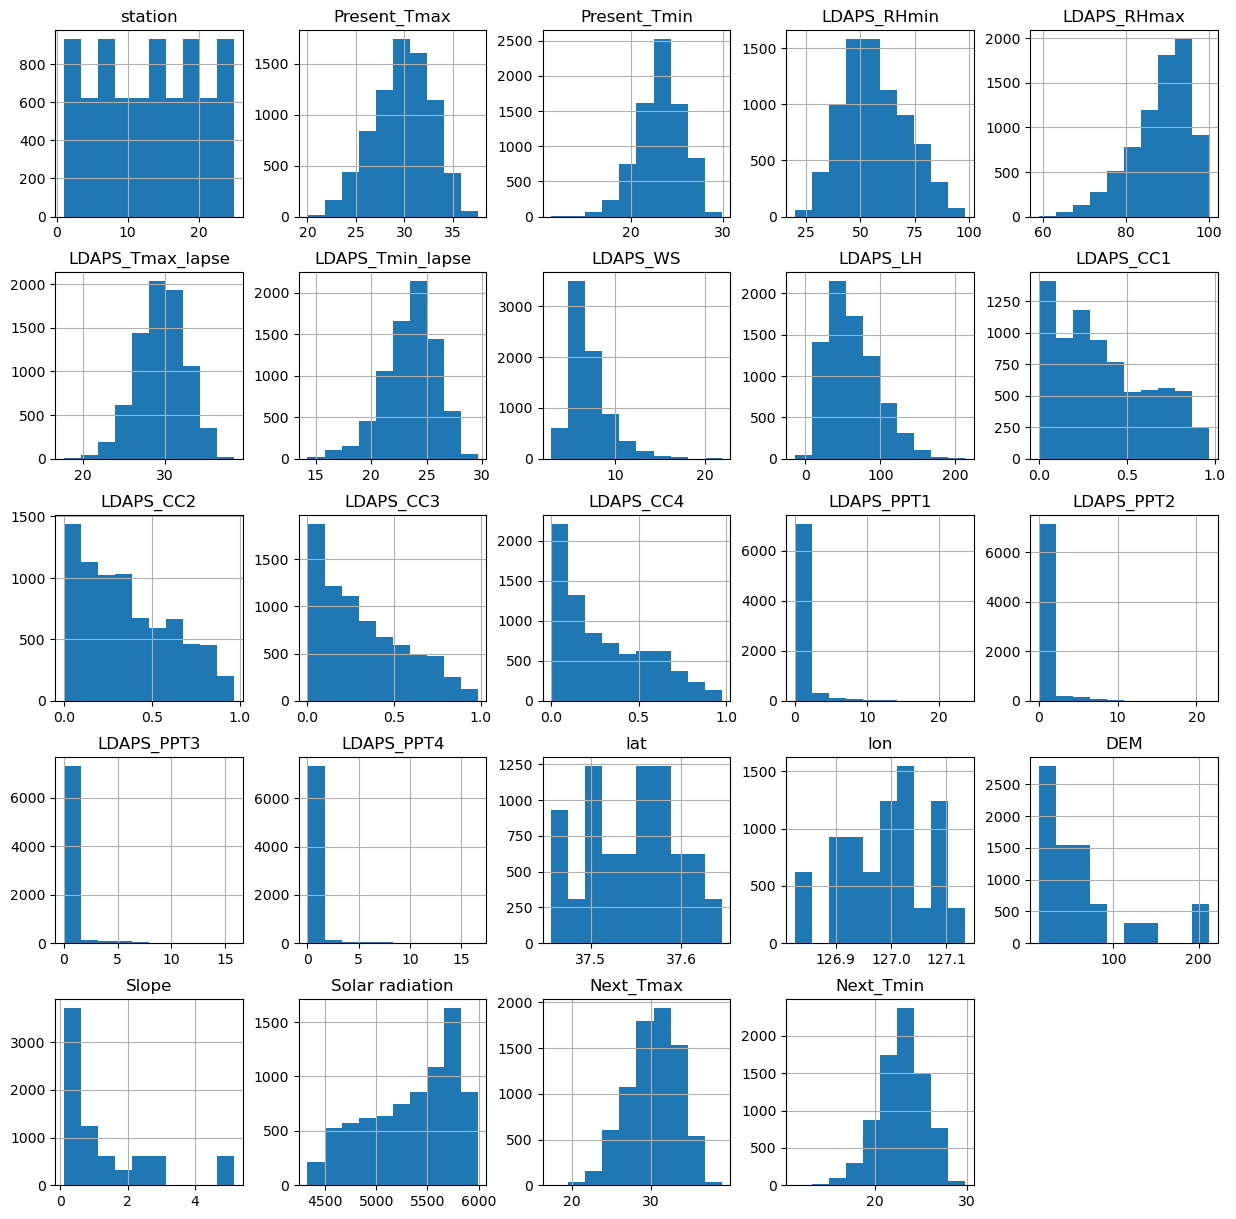

In [18]:
df.hist(figsize=(15,15))
plt.show()

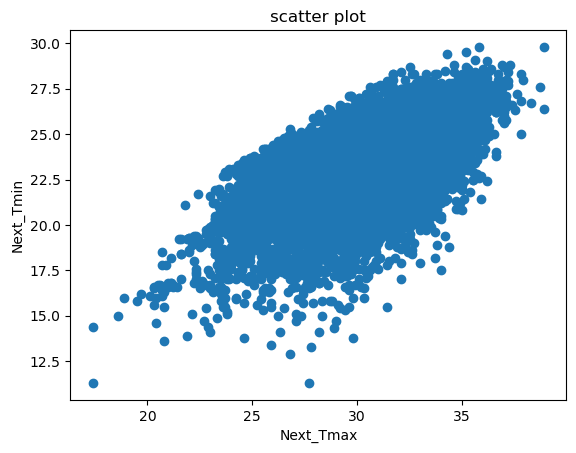

In [19]:
plt.scatter(df["Next_Tmax"],df["Next_Tmin"])
plt.title("scatter plot")
plt.xlabel("Next_Tmax")
plt.ylabel("Next_Tmin")
plt.show()

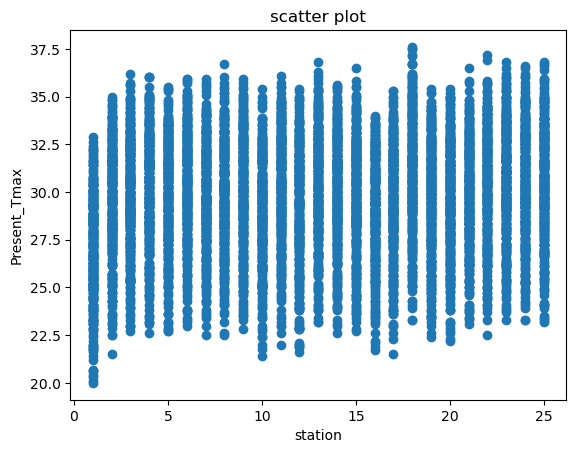

In [20]:
plt.scatter(df["station"],df["Present_Tmax"])
plt.title("scatter plot")
plt.xlabel("station")
plt.ylabel("Present_Tmax")
plt.show()

In [21]:
df["station"].value_counts()

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

In [22]:
df["Present_Tmax"].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64

In [23]:
df["Present_Tmin"].value_counts()

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64

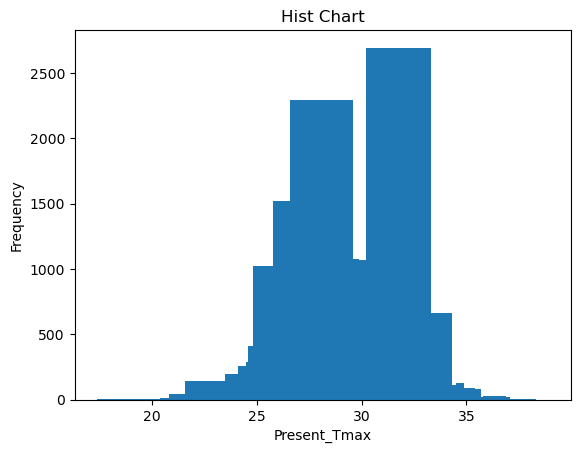

In [24]:
import matplotlib.pyplot as plt
bins = sorted(df["Next_Tmax"])  # Sort Next_Tmax values
plt.hist(df["Present_Tmax"], bins=bins)
plt.title("Hist Chart")
plt.xlabel("Present_Tmax")
plt.ylabel("Frequency")
plt.show()

In [25]:
df=df.drop_duplicates()
print("Rows and columns after droping duplicates:",df.shape)

Rows and columns after droping duplicates: (7752, 25)


<Axes: >

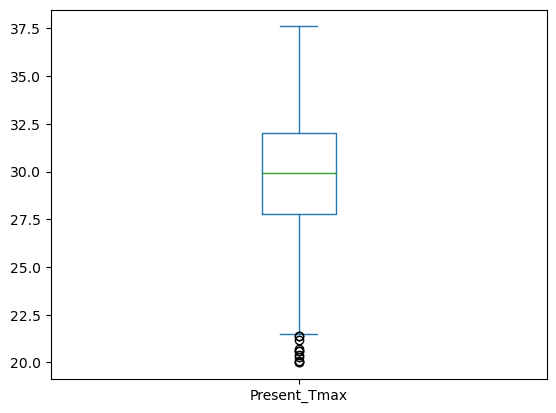

In [26]:
df["Present_Tmax"].plot.box()

-0.3396071784374196


<Axes: xlabel='Next_Tmax', ylabel='Density'>

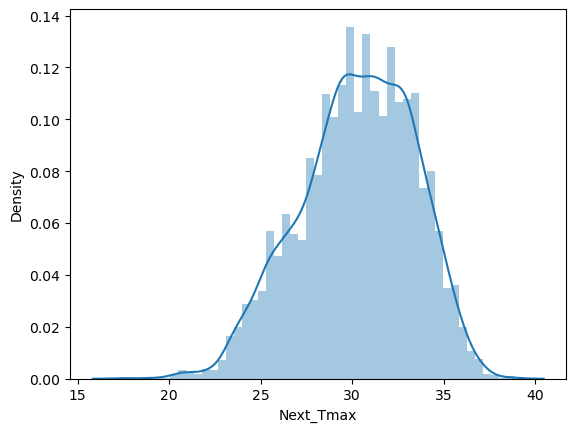

In [27]:
print(df["Next_Tmax"].skew())
sns.distplot(df["Next_Tmax"],kde=True)

-0.4037428032567598


<Axes: xlabel='Next_Tmin', ylabel='Density'>

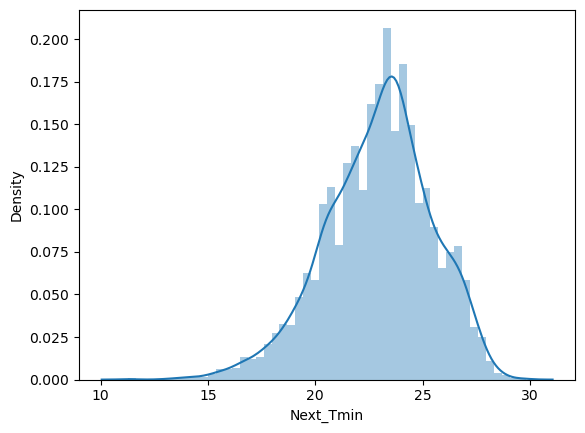

In [28]:
print(df["Next_Tmin"].skew())
sns.distplot(df["Next_Tmin"],kde=True)

-0.5112097190830602


<Axes: xlabel='Solar radiation', ylabel='Density'>

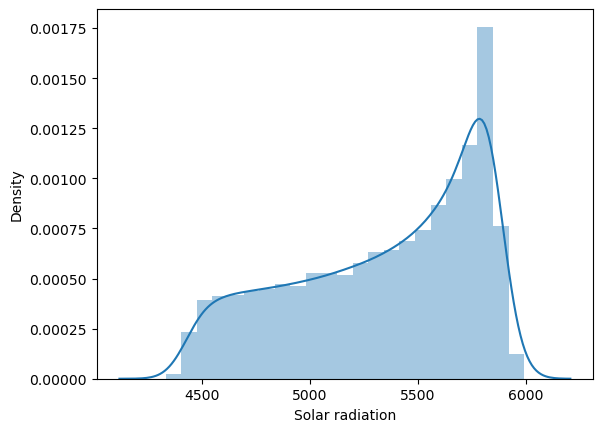

In [29]:
print(df["Solar radiation"].skew())
sns.distplot(df["Solar radiation"],kde=True)

Text(0.0, 1.0, 'Temperature')

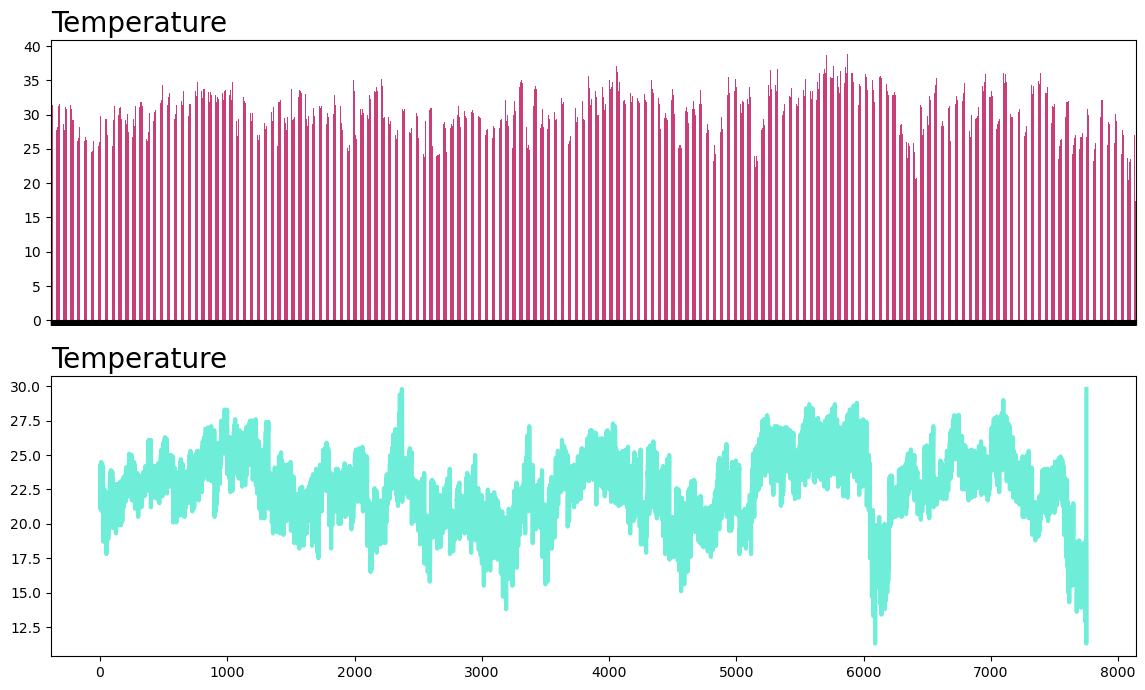

In [30]:
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

df['Next_Tmin'].plot(ax=axes[1], color='#6EEDD8',lw=3.0,sharex=True)
axes[1].set_title('Temperature',loc='left',fontsize=20)

df['Next_Tmax'].plot(ax=axes[0], kind='bar', color='#C93D79',lw=2.0,sharex=True)   
axes[0].set_title('Temperature',loc='left',fontsize=20)

station                Axes(0.125,0.712609;0.0824468x0.167391)
Present_Tmax        Axes(0.223936,0.712609;0.0824468x0.167391)
Present_Tmin        Axes(0.322872,0.712609;0.0824468x0.167391)
LDAPS_RHmin         Axes(0.421809,0.712609;0.0824468x0.167391)
LDAPS_RHmax         Axes(0.520745,0.712609;0.0824468x0.167391)
LDAPS_Tmax_lapse    Axes(0.619681,0.712609;0.0824468x0.167391)
LDAPS_Tmin_lapse    Axes(0.718617,0.712609;0.0824468x0.167391)
LDAPS_WS            Axes(0.817553,0.712609;0.0824468x0.167391)
LDAPS_LH               Axes(0.125,0.511739;0.0824468x0.167391)
LDAPS_CC1           Axes(0.223936,0.511739;0.0824468x0.167391)
LDAPS_CC2           Axes(0.322872,0.511739;0.0824468x0.167391)
LDAPS_CC3           Axes(0.421809,0.511739;0.0824468x0.167391)
LDAPS_CC4           Axes(0.520745,0.511739;0.0824468x0.167391)
LDAPS_PPT1          Axes(0.619681,0.511739;0.0824468x0.167391)
LDAPS_PPT2          Axes(0.718617,0.511739;0.0824468x0.167391)
LDAPS_PPT3          Axes(0.817553,0.511739;0.0824468x0.

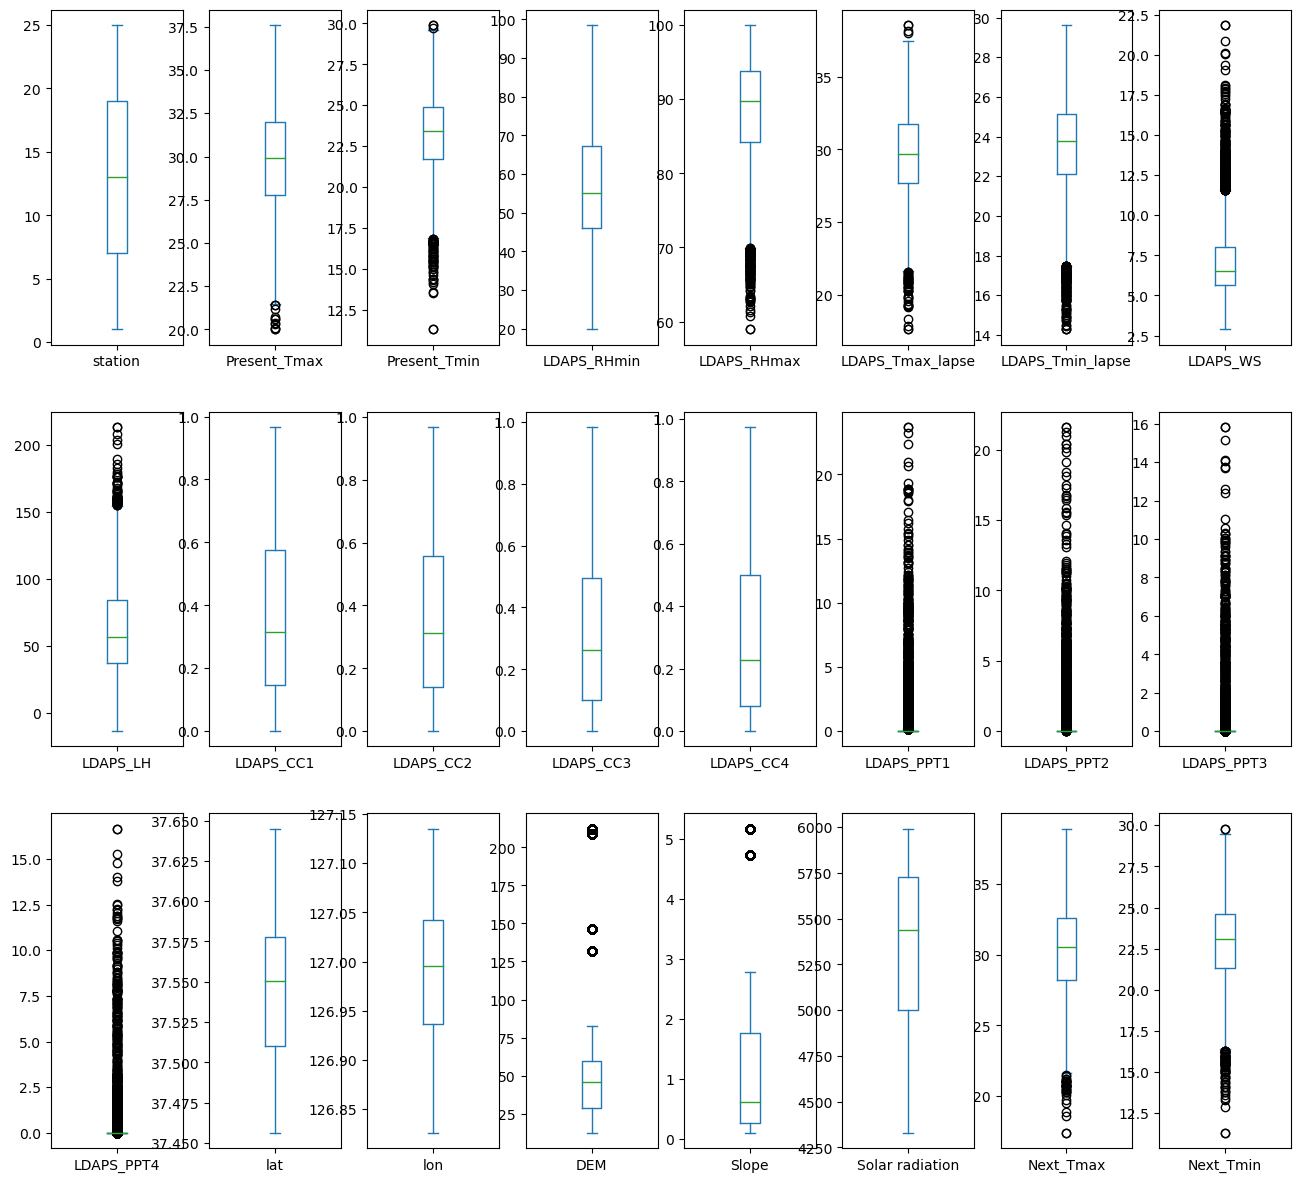

In [31]:
df.plot(kind="box",subplots=True,layout=(4,8),figsize=(16,20))

#from above box plot we find that there are many outliers present in LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4

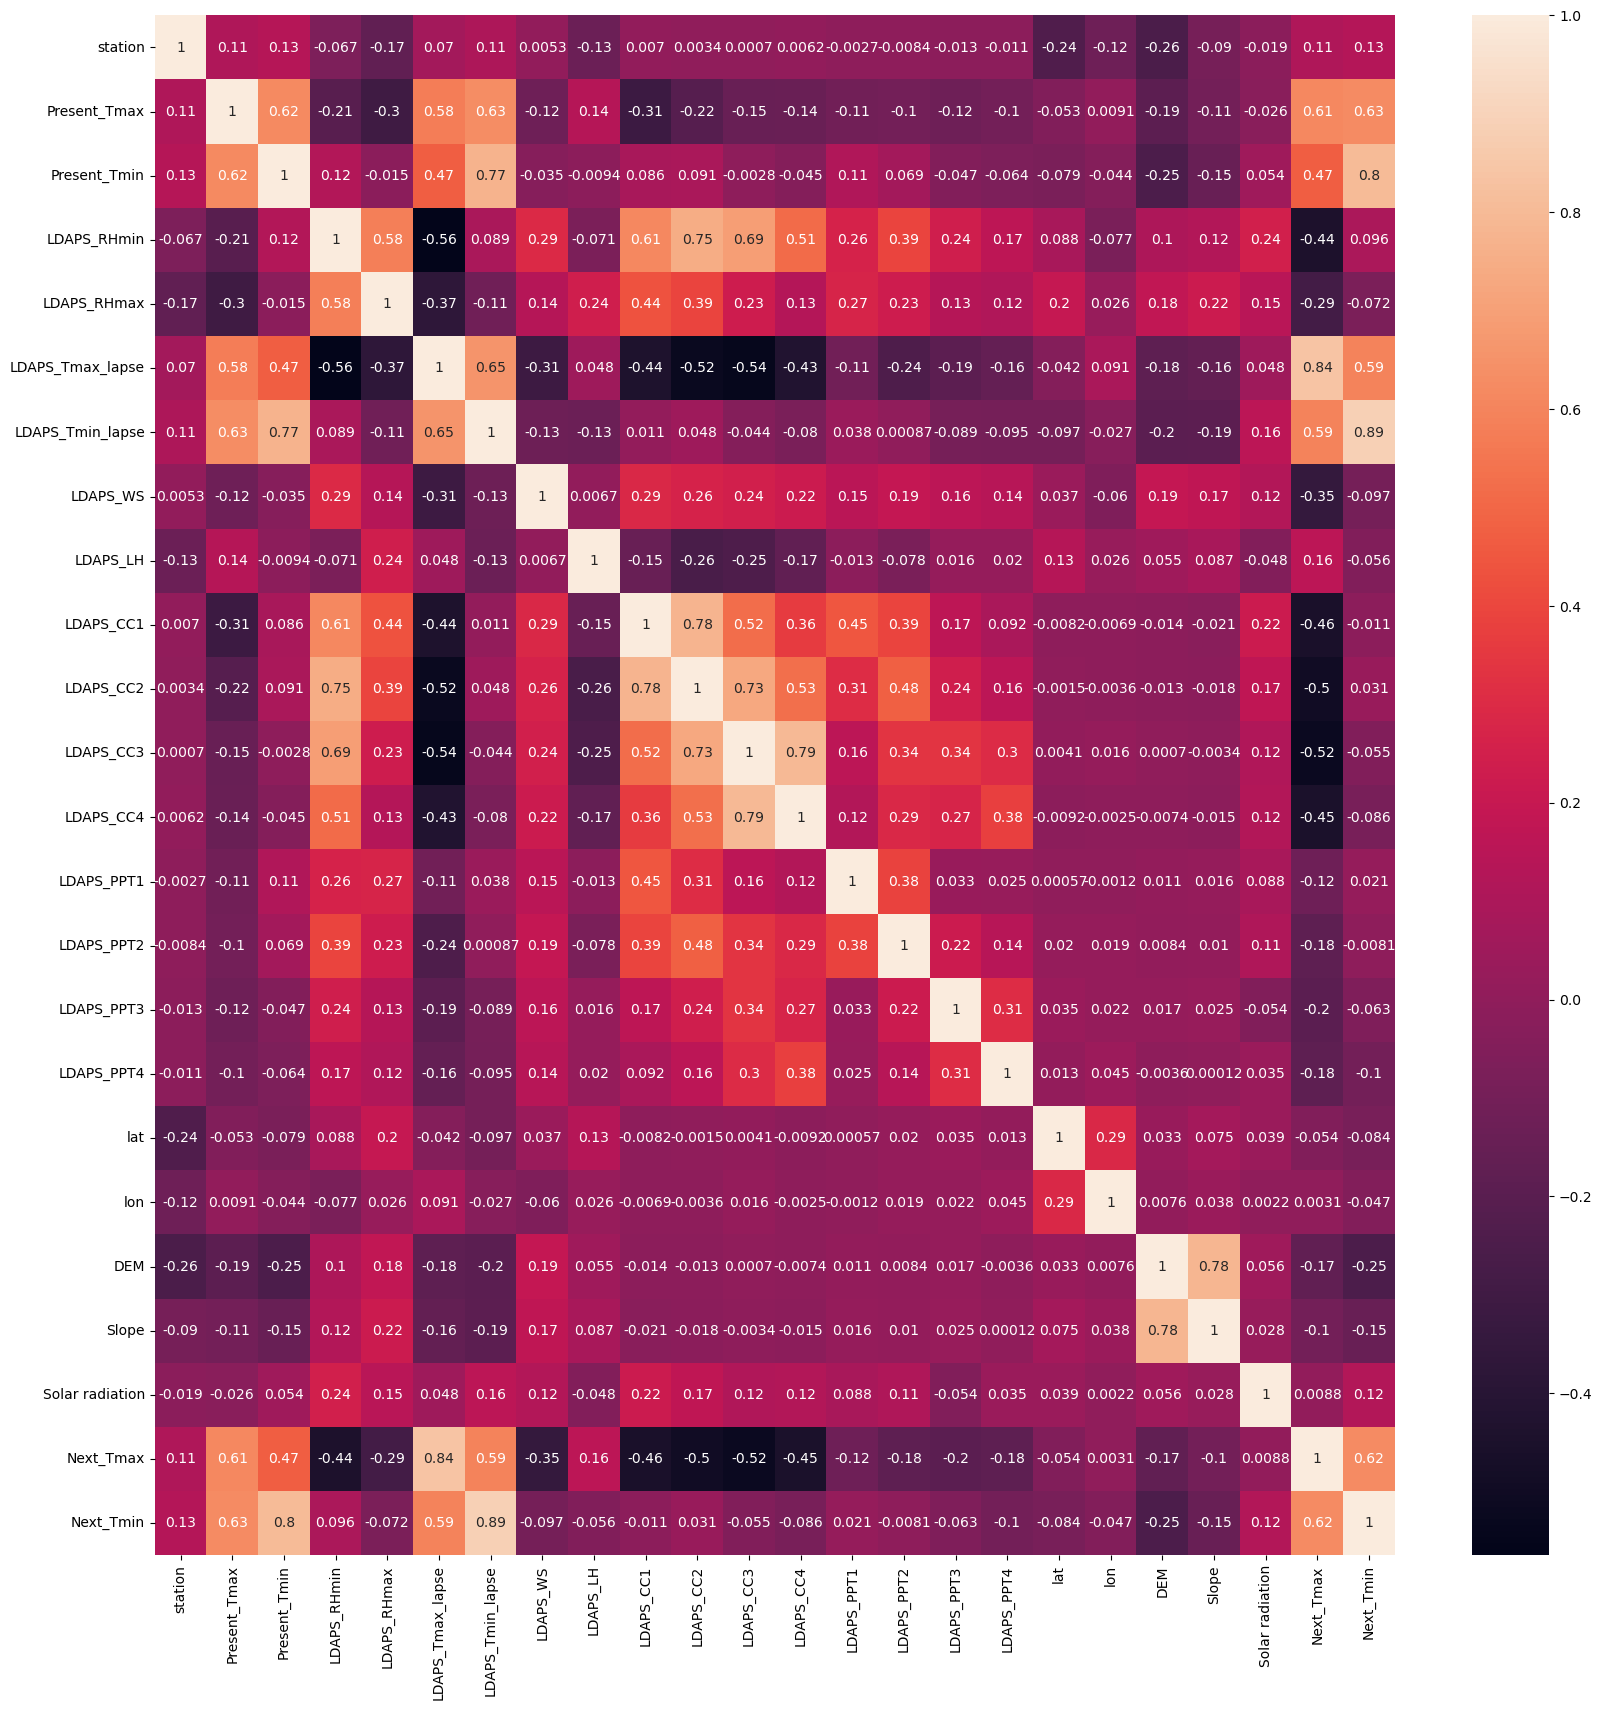

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

#from above heatmap 
#we find high corelation  between Next_Tmax and LDAPS_Tmax_lapse,Present_Tmax,Next_Tmin
#we find mild corelation  between Next_Tmax and LDAPS_Tmin_lapse
#we find negative corelation between LDAPS_RHmin,LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4

#present_Tmax is highly corelated to Next_Tmax and Next_Tmin
#LDAPS_Tmax_lapse is highly corelated to Next_Tmax and Next_Tmin
#DEM is highly corelated to slope


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#The purpose of the LabelEncoder is to encode categorical data into numerical data. Many machine learning algorithms require numerical input, so encoding categorical variables into numerical representations is often necessary.

In [34]:
for i in df:
    df[i]=le.fit_transform(df[i])
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,290,80,73,4445,4440,2281,2868,4328,4818,...,0,0,0,9,11,24,23,1574,92,75
1,1,290,112,75,3258,4181,3984,4228,1943,3348,...,0,0,0,9,16,11,10,1531,106,88
2,2,290,109,92,2472,1848,4243,5013,2957,733,...,0,0,0,8,19,9,6,1517,112,102
3,3,290,113,93,4441,6943,3839,3267,1869,4568,...,0,0,0,11,14,12,21,1500,118,106
4,4,290,107,78,4047,3993,3253,3465,2037,6845,...,0,0,0,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,22,304,26,30,44,899,1042,268,2982,4990,...,0,0,0,6,2,1,4,30,84,44
7748,23,304,26,36,14,681,1442,263,3828,2866,...,0,0,0,5,3,2,5,26,87,51
7749,24,304,25,33,12,670,2146,232,4963,41,...,0,0,0,5,9,3,7,35,79,37
7750,25,310,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664083,1.513313,0.374095,0.761881,0.255673,0.255024,0.712116,0.449732,0.202875,0.421901,...,0.578239,0.555589,0.489433,1.013151,0.138643,1.663721,1.386348,1.739582,0.382242,0.700563
1,1.525448,1.513313,0.678244,0.680984,0.275110,0.139072,0.049110,0.158176,0.863199,0.235177,...,0.578239,0.555589,0.489433,1.013151,0.554574,0.138643,0.415904,1.643617,0.062235,0.181884
2,1.386813,1.513313,0.579587,0.006637,0.626580,0.905395,0.164881,0.509064,0.409950,1.404058,...,0.578239,0.555589,0.489433,0.679891,0.970504,0.415930,0.970444,1.612373,0.252725,0.376693
3,1.248178,1.513313,0.711130,0.047085,0.253885,1.375599,0.015704,0.271383,0.896277,0.310153,...,0.578239,0.555589,0.489433,1.679672,0.277287,0.000000,1.109079,1.574433,0.443216,0.536286
4,1.109544,1.513313,0.513816,0.559639,0.077702,0.054906,0.277641,0.182879,0.821182,1.327952,...,0.578239,0.555589,0.489433,0.346630,1.663721,0.277287,0.554539,1.596750,0.284474,0.181884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.385883,1.669717,2.149917,2.501157,1.712294,1.330256,1.265938,1.611909,0.398775,0.498783,...,0.578239,0.555589,0.489433,0.013370,1.386434,1.525078,1.247713,1.706225,0.636229,1.937413
7748,1.524518,1.669717,2.149917,2.258467,1.725709,1.427853,1.087142,1.614144,0.020621,0.450626,...,0.578239,0.555589,0.489433,0.319890,1.247791,1.386434,1.109079,1.715152,0.540984,1.658124
7749,1.663153,1.669717,2.182803,2.379812,1.726603,1.432777,0.772460,1.628001,0.486714,1.713376,...,0.578239,0.555589,0.489433,0.319890,0.415930,1.247791,0.831809,1.695067,0.794971,2.216701
7750,1.801788,1.736747,3.004943,3.714606,1.731969,1.732731,1.731703,1.731703,1.731703,1.731703,...,0.578239,0.555589,0.489433,1.986193,1.663721,1.663721,1.802253,1.773178,3.303091,3.692941


In [36]:
threshold=3
print(np.where(z>3))

(array([ 150,  151,  152,  153,  154,  155,  157,  159,  160,  161,  162,
        163,  164,  165,  166,  167,  169,  170,  171,  174, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048,
       1049, 2752, 2754, 2755, 2757, 2759, 2760, 2762, 2765, 2767, 2770,
       2771, 2953, 2954, 2955, 2960, 3166, 3184, 3190, 3191, 3191, 3209,
       3215, 3216, 3266, 3525, 4566, 4591, 4650, 4651, 4652, 4653, 4654,
       4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665,
       4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4726, 4727,
       4728, 4729, 4730, 4732, 4734, 4735, 4737, 4740, 4741, 4742, 4745,
       4746, 4749, 4753, 5425, 5426, 5427, 5428, 5429, 5430, 5431, 5432,
       5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443,
       5444, 5445, 5446, 5447, 5448, 5449, 5852, 5862, 5925, 5926, 5927,
       5928, 5929, 5930, 5931, 5932, 5933, 5934, 5

In [37]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,290,80,73,4445,4440,2281,2868,4328,4818,...,0,0,0,9,11,24,23,1574,92,75
1,1,290,112,75,3258,4181,3984,4228,1943,3348,...,0,0,0,9,16,11,10,1531,106,88
2,2,290,109,92,2472,1848,4243,5013,2957,733,...,0,0,0,8,19,9,6,1517,112,102
3,3,290,113,93,4441,6943,3839,3267,1869,4568,...,0,0,0,11,14,12,21,1500,118,106
4,4,290,107,78,4047,3993,3253,3465,2037,6845,...,0,0,0,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,20,304,24,37,19,816,2038,213,3967,56,...,0,0,0,7,17,5,11,38,77,40
7746,21,304,18,33,118,1791,1241,166,2113,5624,...,0,0,0,4,22,4,2,29,81,34
7747,22,304,26,30,44,899,1042,268,2982,4990,...,0,0,0,6,2,1,4,30,84,44
7748,23,304,26,36,14,681,1442,263,3828,2866,...,0,0,0,5,3,2,5,26,87,51


In [38]:
df.drop(["LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"],axis=1,inplace=True)


In [44]:
encoded_data = pd.get_dummies(df)

In [41]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,290,80,73,4445,4440,2281,2868,4328,4818,...,2553,2622,0,9,11,24,23,1574,92,75
1,1,290,112,75,3258,4181,3984,4228,1943,3348,...,2522,2567,0,9,16,11,10,1531,106,88
2,2,290,109,92,2472,1848,4243,5013,2957,733,...,3109,2826,0,8,19,9,6,1517,112,102
3,3,290,113,93,4441,6943,3839,3267,1869,4568,...,2547,2679,0,11,14,12,21,1500,118,106
4,4,290,107,78,4047,3993,3253,3465,2037,6845,...,2792,3167,0,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,22,304,26,30,44,899,1042,268,2982,4990,...,0,0,0,6,2,1,4,30,84,44
7748,23,304,26,36,14,681,1442,263,3828,2866,...,0,0,0,5,3,2,5,26,87,51
7749,24,304,25,33,12,670,2146,232,4963,41,...,0,96,0,5,9,3,7,35,79,37
7750,25,310,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Here we predicting the Next_Tmin data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x=df.drop("Next_Tmin",axis=True)
y=df["Next_Tmin"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (6201, 21)
Size of x_test : (1551, 21)
Size of x_train : (6201,)
Size of x_train : (1551,)


In [50]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# Evaluate random forest classifier

clf.score(x_test,y_test)

0.0735009671179884

In [52]:
x_test.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
5082,7,163,19,63,4551,5053,1975,756,613,2765,...,2370,2544,164,294,1,4,14,18,1094,84
5597,22,58,143,139,5246,1988,5894,7564,1750,6574,...,2442,2737,1541,1794,6,2,1,4,595,160
1623,23,11,97,95,6827,2921,178,1437,4011,4602,...,6157,6596,5089,1464,5,3,2,5,1436,54
6821,21,234,73,116,2276,3378,6928,6394,1721,6057,...,4085,2964,1479,0,4,22,4,2,936,160
3892,17,307,123,124,5751,4001,4426,6210,4812,5353,...,5794,3979,3548,0,2,15,17,17,771,135


In [53]:
clf.predict(x_test)
np.array(y_test)

array([ 66, 138,  75, ...,  86,  58,  78], dtype=int64)

In [57]:
# Compare prediction to truth labels to evaluate the model 

y_predas=clf.predict(x_test)

In [58]:
np.mean(y_predas==y_test)

0.0735009671179884

In [59]:
clf.score(x_test,y_test)

0.0735009671179884

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [67]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=420)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)
    

In [68]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.030959752321981424
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.0

In [69]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.043859649122807015
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 5]]

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.0

In [70]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.07997936016511868
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 8]]

Classification Report:
               precision    recall  f1-score   support

           7       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          26       0.00      0.00      0.00

In [71]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.028379772961816305
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.0

In [72]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.005675954592363261
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.20      0.00         5
          30       0.00      0.00      0.0

KeyboardInterrupt: 

# here we are predicting maximum temperature for the next day 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
np.random.seed(42)
x=df.drop("Next_Tmax",axis=1)
y=df["Next_Tmax"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf = DecisionTreeClassifier()  
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
clf.score(x_test,y_test)

0.032237266279819474

In [81]:
x_test.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
5082,7,163,19,63,4551,5053,1975,756,613,2765,...,2370,2544,164,294,1,4,14,18,1094,66
5597,22,58,143,139,5246,1988,5894,7564,1750,6574,...,2442,2737,1541,1794,6,2,1,4,595,138
1623,23,11,97,95,6827,2921,178,1437,4011,4602,...,6157,6596,5089,1464,5,3,2,5,1436,75
6821,21,234,73,116,2276,3378,6928,6394,1721,6057,...,4085,2964,1479,0,4,22,4,2,936,115
3892,17,307,123,124,5751,4001,4426,6210,4812,5353,...,5794,3979,3548,0,2,15,17,17,771,123


In [82]:
clf.predict(x_test)

array([ 82, 153,  60, ..., 114,  75, 133], dtype=int64)

In [83]:
np.array(y_test)

array([ 84, 160,  54, ...,  83,  53, 106], dtype=int64)

# compare prediction to truth labels to evaluate the model

In [84]:
y_predas=clf.predict(x_test)

In [85]:
np.mean(y_predas==y_test)

0.032237266279819474

In [86]:
clf.score(x_test,y_test)

0.032237266279819474

In [87]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=420)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [88]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.03147574819401445
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00

In [89]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.03715170278637771
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 7]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       1.00      0.50      0.67         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00

In [90]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.058823529411764705
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 8]]

Classification Report:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.0

In [91]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.030959752321981424
confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.0

In [95]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.06769825918762089
Confusion Matrix
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00  

In [93]:
rf_final = RandomForestClassifier(criterion="entropy", max_depth=20, min_samples_leaf=3,
                                   min_samples_split=10, n_estimators=100, random_state=420)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print("accuracy:",accuracy_score(y_test,predrf))
print("confusion matrix:\n",confusion_matrix(y_test,predrf))
print("classification report:\n",classification_report(y_test,predrf))

accuracy: 0.061895551257253385
confusion matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00      

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

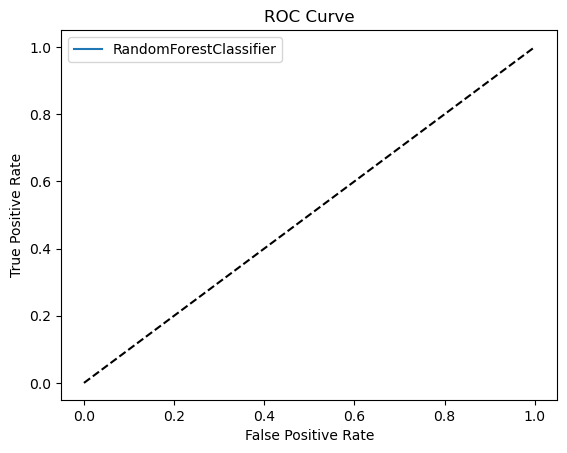

In [103]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming rf is your RandomForestClassifier model
clf = OneVsRestClassifier(rf)
clf.fit(x_train, y_train)
y_pred_prob = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Save the model

In [104]:
import joblib

In [105]:
joblib.dump(clf,"Tempforecast.obj")

['Tempforecast.obj']

In [106]:
Tempforecast=joblib.load("Tempforecast.obj")

In [107]:
clf_from_joblib=joblib.load("Tempforecast.obj")

In [108]:
clf_from_joblib.predict(x_test)

array([ 95, 150,  53, ...,  94,  58,  98], dtype=int64)